<font size=5> **MTH9831 Homework1 Numerical Projects** </font>

<font size=3> **Team members:** </font>
- Chu, Gujia
- Twahir, Omar
- Wu, Chengxun
- Zhu, Bin

<font size=3> **Numerical Project Work Breakdown:** </font>
- Omar: Project 4.3
- Bin: Project 4.2
- Chengxun and Gujia: Proofreading and formatting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import warnings
from scipy.stats import norm

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Project 4.2

In [2]:
def generate_bm(T, dt):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m)
    randomness[0] = 0
    return randomness.cumsum()


dt = 0.01  # step size
T = 1.0  # the number of continuous time steps

# generate maximum results
res = [max(generate_bm(T, dt)) for _ in range(10000)]

## (a) and (b): Plot and Comparison

- We use the fact that $B_1$ has standard normal distribution $\mathcal{N}(0,1)$:$$\mathbb{P}(|Z| = x) = \mathbb{P}(Z=-x)+\mathbb{P}(Z=x) = 2f(x)$$ where $Z$ is a standard normal random variable and $f$ denotes the corresponding pdf.
- This is indeed a good choice which can be seen from the picture below:

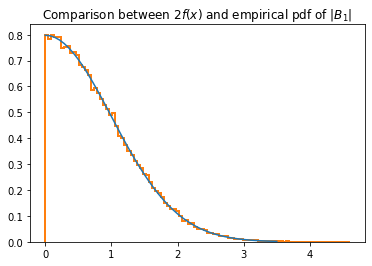

In [3]:
x_axis = np.linspace(0.0, 3.5, num=50)
abs_bm = [abs(generate_bm(T, dt)[-1]) for _ in range(100000)]
plt.plot(x_axis, 2 * norm.pdf(x_axis, 0, 1))
plt.hist(abs_bm, bins=100, density=True, histtype="step", linewidth=2)
plt.title("Comparison between $2f(x)$ and empirical pdf of $|B_1|$")
plt.show()

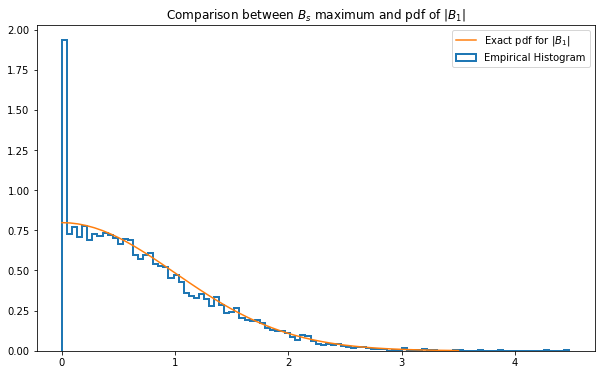

In [4]:
# Now we get back to the original problem

plt.figure(figsize=(10, 6))
plt.hist(res, bins=100, density=True, histtype='step', linewidth=2)
x_axis = np.linspace(0.0, 3.5, num=50)
plt.plot(x_axis, 2 * norm.pdf(x_axis, 0, 1))
plt.title("Comparison between $B_s$ maximum and pdf of $|B_1|$")
plt.legend(["Exact pdf for $|B_1|$", "Empirical Histogram"])
plt.show()

## Comments:
- The histogram of random variable maximum of Brownian motion on [0,1] is approximate to PDF of the random variable $|B_1|$, except for a peak around $0$ for the empirical histogram.

# Project 4.3

In [5]:
# T is the ending time of the time interval and dt is the time step with brownian_motion as the function
def BM_first_passage_time(T, dt, level=1):

    # Create a list to store the Brownian Motions
    # the increments follow a normal distribution with mean 0 and variance to be the time step
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m)
    randomness[0] = 0
    bm = randomness.cumsum()

    tau = T

    # find the first time step that crosses the threshold and store that stopping time
    for index, value in enumerate(bm):
        # detect whether touches the level
        if value > level:
            tau = index * dt
            break

    # in this sense, the for loop will not break if haven't reached level 1
    return tau

## Histogram of $\tau\wedge 10$ on $[0,10]$

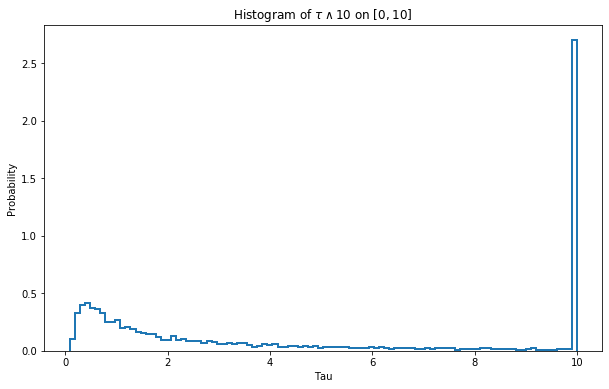

In [6]:
# store the taus in a list then plot the histogram
plt.figure(figsize=(10, 6))
taus = [BM_first_passage_time(10, 0.01, 1) for _ in range(10000)]
plt.hist(taus, bins=100, histtype="step", density=True, linewidth=2)
plt.ylabel('Probability')
plt.xlabel('Tau')
plt.title("Histogram of $\\tau\wedge 10$ on $[0,10]$")
plt.show()

## Estimation of stopping time expectation
- We use the sample mean of $\tau\wedge 10$, obtain a number of around 4.2-4.3

## Proportion of non-stopping
- We use $P=\frac{\text{# 10 in the experiments results}}{\text{# Total Trials}}$, and obtain a result of around 2.5-2.6

In [7]:
print("Estimation of expected stopping time: {:.4f}".format(np.mean(taus)))
print("Estimation of non-stopping probability: ", taus.count(10) / len(taus))

Estimation of expected stopping time: 4.3450
Estimation of non-stopping probability:  0.2664
